# Linear Regression and PCA - Boston Housing

# About the Data

- CRIM: уровень преступности на душу населения по городам.
- ZN: доля земли под жилую застройку, предназначенная для участков более 25,000 кв. футов.
- INDUS: доля акров неторгового бизнеса на город.
- CHAS: переменная-фиктивка для Charles River (= 1, если участок граничит с рекой; 0 в противном случае).
- NOX: концентрация оксидов азота (частей на 10 миллионов).
- RM: среднее количество комнат в доме.
- AGE: доля жилых единиц, построенных до 1940 года.
- DIS: взвешенные расстояния до пяти бостонских центров занятости.
- RAD: индекс доступности радиальных магистралей.
- TAX: полная ставка налога на имущество на $10,000.
- PTRATIO: соотношение учеников и учителей по городам.
- B: 1000(Bk - 0.63)^2, где Bk — доля чернокожего населения по городам.
- LSTAT: % более низкого статуса населения.
- MEDV: Средняя стоимость домов в $1000'с.

# Data Loading

In [40]:
# Import Libraries needed to load the data
import pandas as pd

In [41]:
# Load the data from sklearn module
df = pd.read_csv('HousingData.csv')
print('Shape of Data is : {} rows and {} columns'.format(df.shape[0],df.shape[1]))

Shape of Data is : 506 rows and 14 columns


In [42]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [43]:
# Lets look at the null values of the data
df.dropna(inplace=True)
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [44]:
# Lets look at the datatype of the features
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

All numeric, great!!!

# Exploratory Data Analysis

In [45]:
# import libraries needed to do EDA
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/j5/k1rdz_7s6q1_gkrbwlghktvc0000gn/T/ipykernel_94785/3294422824.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],ax=ax)
/var/folders/j5/k1rdz_7s6q1_gkrbwlghktvc0000gn/T/ipykernel_94785/3294422824.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],ax=ax)
/var/folders/j

/var/folders/j5/k1rdz_7s6q1_gkrbwlghktvc0000gn/T/ipykernel_94785/3294422824.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],ax=ax)
/var/folders/j5/k1rdz_7s6q1_gkrbwlghktvc0000gn/T/ipykernel_94785/3294422824.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i],ax=ax)
/var/folders/j

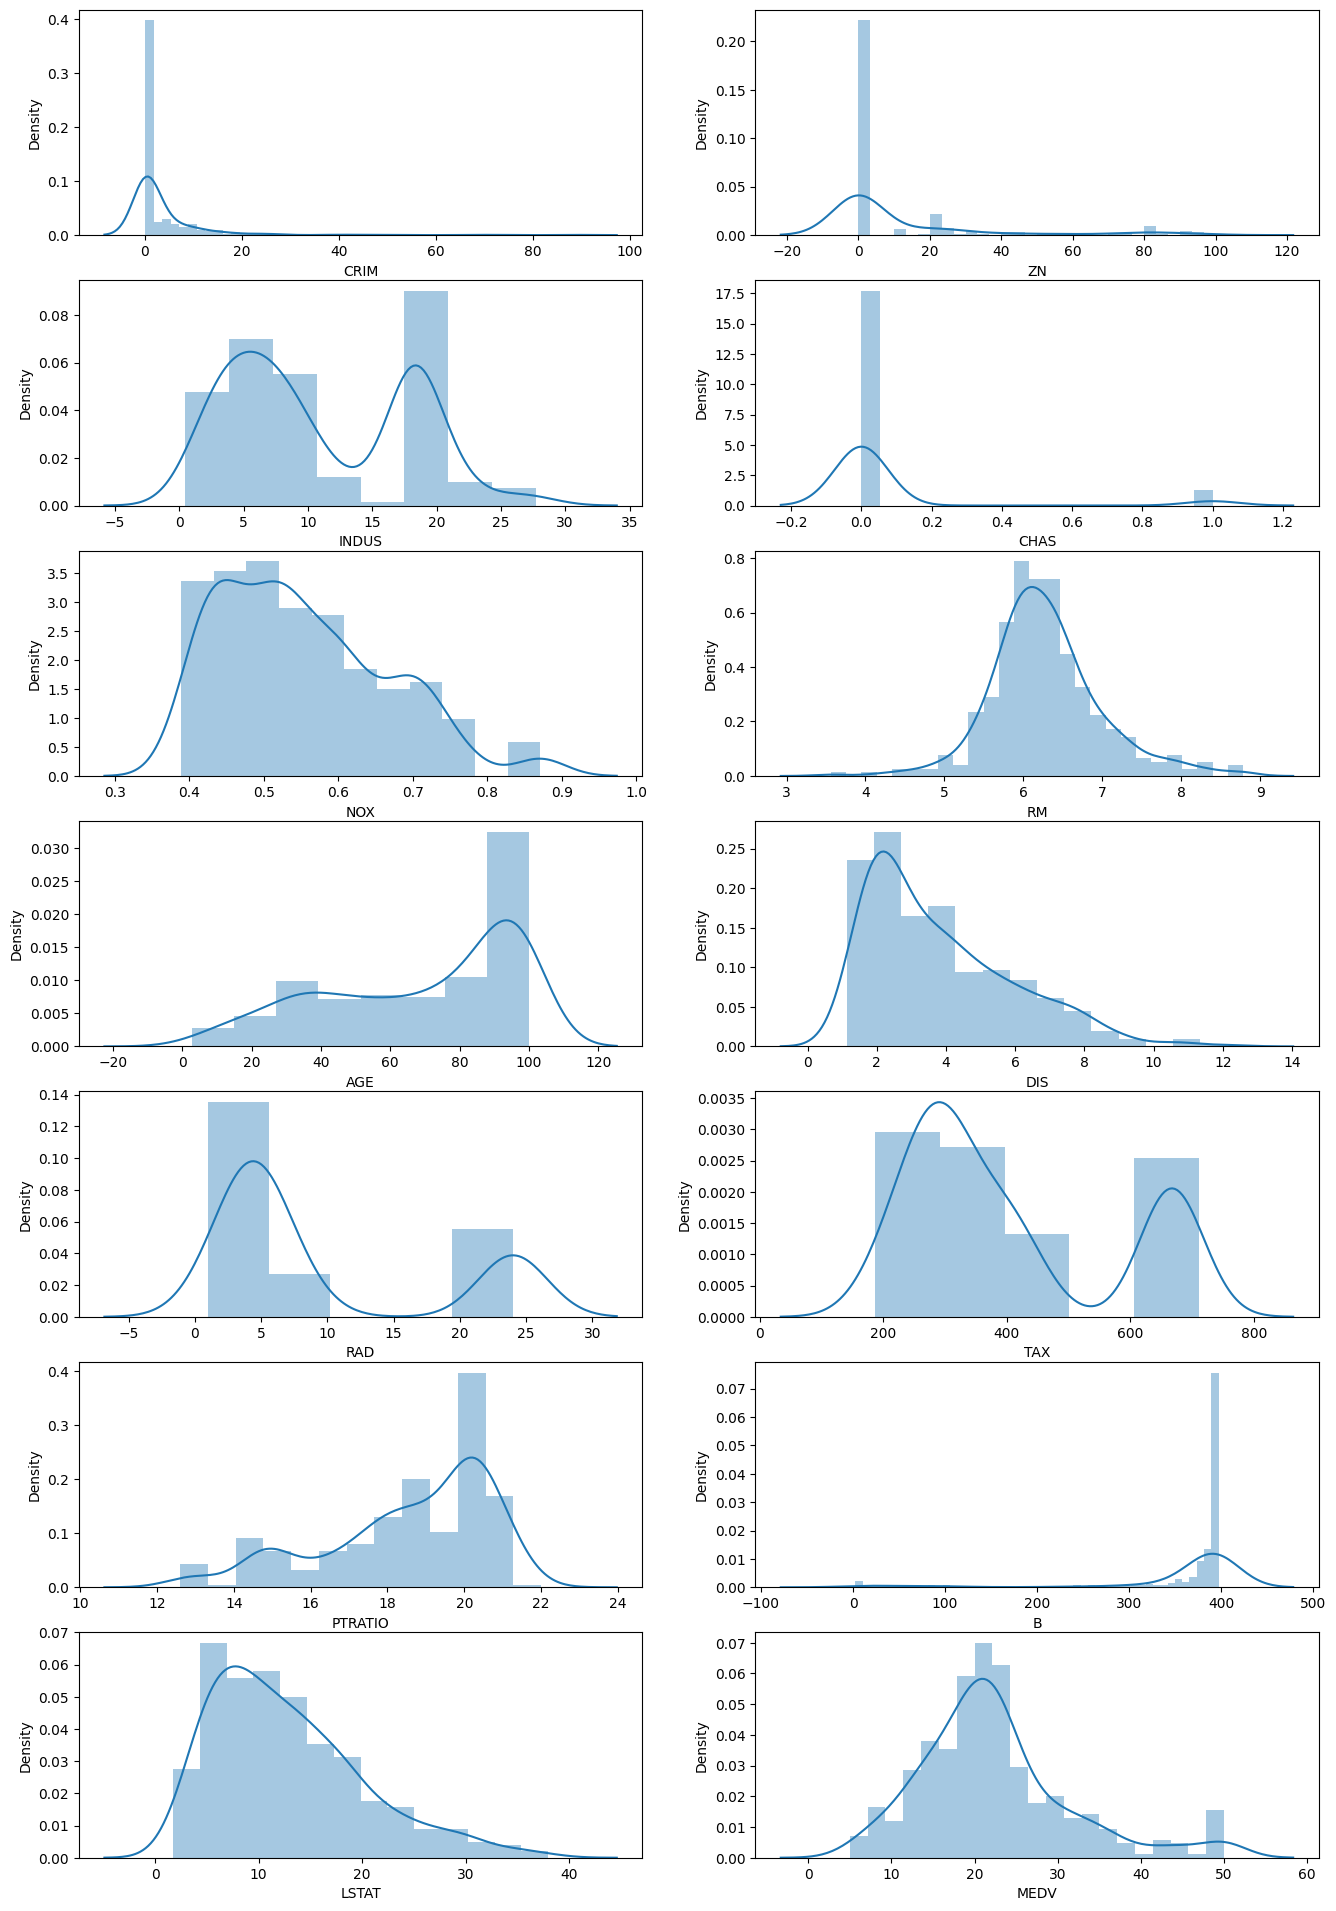

In [46]:
# Lets look at the distribution plot of the features
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(df[i],ax=ax)

Except RM and MEDV, nothing else is normally distributed, this might be an issue, as most statistical assumptions hold true only when our data is normally distributed.

In [47]:
# lets look at some descriptive stats of our features
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000,394.000000
mean,3.690136,11.460660,11.000863,0.068528,0.553215,6.280015,68.932741,3.805268,9.403553,406.431472,18.537563,358.490939,12.769112,22.359645
std,9.202423,23.954082,6.908364,0.252971,0.113112,0.697985,27.888705,2.098571,8.633451,168.312419,2.166460,89.283295,7.308430,9.142979
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,2.600000,1.730000,5.000000
25%,0.081955,0.000000,5.130000,0.000000,0.453000,5.879250,45.475000,2.110100,4.000000,280.250000,17.400000,376.707500,7.125000,16.800000
50%,0.268880,0.000000,8.560000,0.000000,0.538000,6.201500,77.700000,3.199200,5.000000,330.000000,19.100000,392.190000,11.300000,21.050000
75%,3.435973,12.500000,18.100000,0.000000,0.624000,6.605500,94.250000,5.116700,24.000000,666.000000,20.200000,396.900000,17.117500,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Масштаб наших функций сильно отличается друг от друга, поэтому нам, возможно, придется изменить масштаб наших данных, чтобы улучшить качество данных, поскольку мы не можем применить к этим данным PCA или линейную регрессию.

<Axes: >

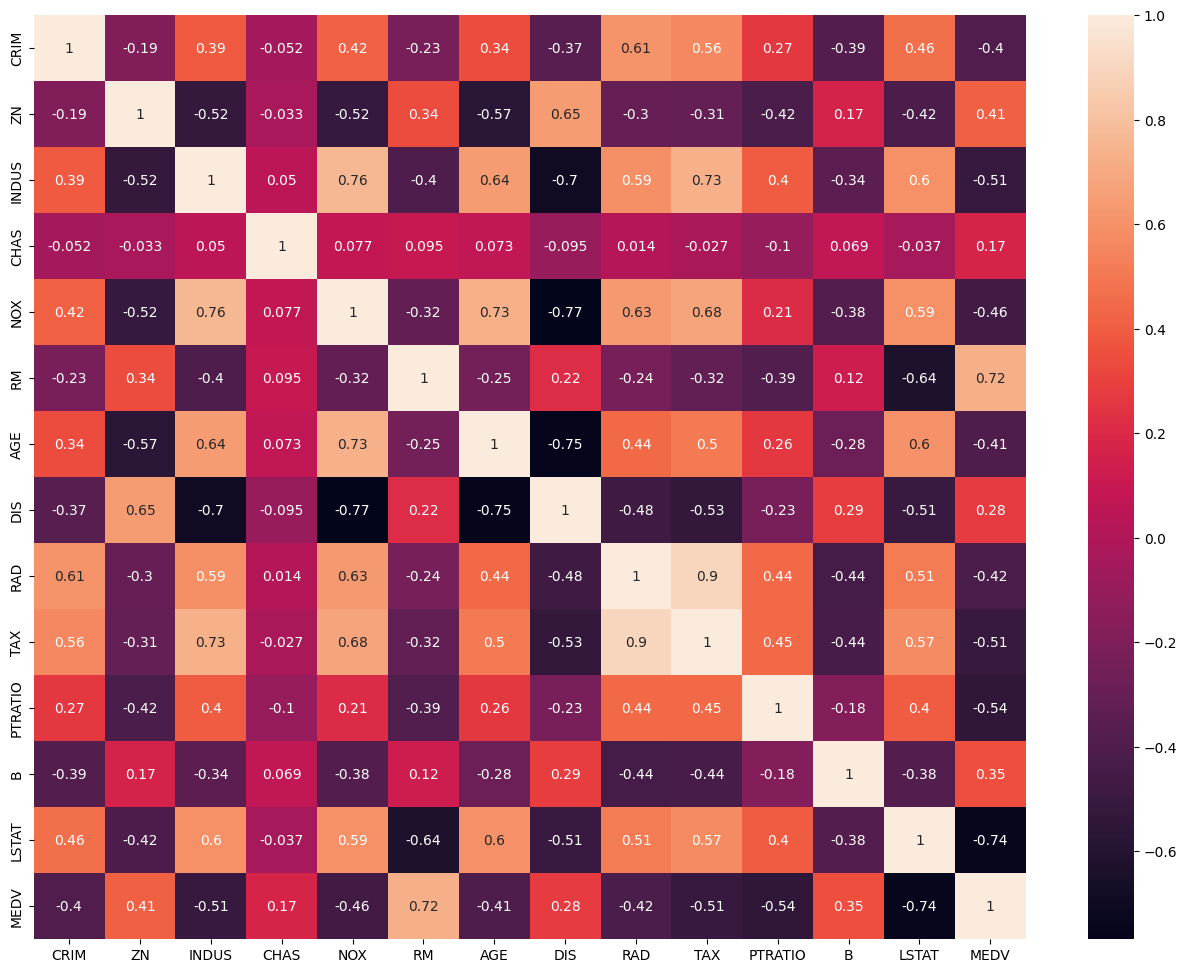

In [48]:
# Lets look at the correlation matrix of our data.
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(df.corr(),annot=True)

#### Note :
Наша целевая переменная, похоже, сильно коррелирует с LSTAT и RM, что имеет смысл, поскольку эти два фактора являются очень важными факторами для ценообразования на жилье, но, похоже, также существует значительная мультиколлинеарность.

Проблема здесь в том, что между нашими переменными-предикторами существует значительная коллинеарность, например, DIS сильно коррелирует с INUDS, INOX и AGE.

Это нехорошо, поскольку мультиколлинеарность может сделать нашу модель нестабильной, нам нужно посмотреть на нее немного больше, прежде чем моделировать наши данные, я объяснил проблему мультиколлинеарности ниже.

## Фактор инфляции дисперсии

Фактор инфляции дисперсии (VIF) обнаруживает мультиколлинеарность в регрессионном анализе. Мультиколлинеарность — это когда в модели существует корреляция между предикторами (т. е. независимыми переменными); его присутствие может отрицательно повлиять на результаты вашей регрессии. VIF оценивает, насколько завышена дисперсия коэффициента регрессии из-за мультиколлинеарности модели.

\begin{align*}
VIF = 1/(1 - R^2)
\end{align*}

Где <b>R Squared</b> — это <b>коэффициент детерминации</b>, проще говоря, это доля дисперсии независимой переменной, которая объясняется зависимой переменной. Формула r в квадрате выглядит следующим образом

\begin{align*}
R^2 = 1 - (Residual sum of Squares)/(Total Sum of Squares)
\end{align*}

Итак, мы выполняем линейную регрессию, используя каждую переменную в качестве целевой, а другие в качестве предикторов, и вычисляем R-квадрат, а затем вычисляем для них VIF.

Если VIF < 4, его можно использовать, в противном случае нам нужно найти способ удалить коллинеарность из этих функций.

In [49]:
# import libraries needed for this.
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [50]:
# lets get the VIF value to understand the multi collinearity
vifdf = []
for i in df.columns:
    X = np.array(df.drop(i,axis=1))
    y = np.array(df[i])
    lr = LinearRegression()
    lr.fit(X,y)
    y_pred = lr.predict(X)
    r2 = r2_score(y,y_pred)
    vif = 1/(1-r2)
    vifdf.append((i,vif))

vifdf = pd.DataFrame(vifdf,columns=['Features','Variance Inflation Factor'])
vifdf.sort_values(by='Variance Inflation Factor')

,Features,Variance Inflation Factor
3,CHAS,1.094393
11,B,1.410486
0,CRIM,1.782836
10,PTRATIO,2.012261
1,ZN,2.392337
5,RM,2.566120
6,AGE,3.180587
12,LSTAT,3.648790
2,INDUS,4.051952
13,MEDV,4.293964


### Note :
Мы видим, что почти половина наших функций имеют значение VIF, превышающее или близкое к 4, а TAX и RAD имеют значение VIF, почти вдвое превышающее наш порог.

### Problem of Multicollinearity

При наличии мультиколлинеарности оценка влияния одной переменной на зависимую переменную Y при контроле над другими имеет тенденцию быть менее точной, чем если бы предикторы не коррелировали друг с другом.

Обычная интерпретация коэффициента регрессии заключается в том, что он дает оценку эффекта изменения одной единицы независимой переменной, при этом остальные переменные остаются постоянными.

Если X1 сильно коррелирует с другой независимой переменной, X2, в данном наборе данных, то у нас есть набор наблюдений, для которых X1 и X2 имеют определенную линейную стохастическую связь.

У нас нет набора наблюдений, для которых все изменения X1 независимы от изменений X2, поэтому мы имеем неточную оценку эффекта независимых изменений X1.

# Standardiztion of Data

### Rescaling the data

Поскольку наши данные состоят из множества видов объектов, каждый из которых имеет разный масштаб. Это подходит для анализа, но не для моделирования данных. Поскольку разные масштабы могут привести к тому, что наша модель будет нестабильной и будет варьироваться больше, чем нам хотелось бы.

#### Z-score Normalization

\begin{align*}
x' = (x - mean)/std
\end{align*}

This will give us data with mean = 0 and std = 1

In [51]:
# Lets build our function which will perform the normaliztion
def rescale(X):
    mean = X.mean()
    std = X.std()
    scaled_X = [(i - mean)/std for i in X]
    return pd.Series(scaled_X)

In [52]:
# We will build a new dataframe
df_std = pd.DataFrame(columns=df.columns)
for i in df.columns:
    df_std[i] = rescale(df[i])

In [53]:
# Lets look at the descriptive stats now
df_std.describe().iloc[1:3:]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
mean,-1.082045e-16,2.254260e-17,-1.803408e-17,0.0,5.229883e-16,3.020708e-16,-1.713238e-16,-5.410224e-17,7.213632e-17,7.213632e-17,4.688861e-16,-5.410224e-17,-3.606816e-16,-1.442726e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


### Note : Форма данных не меняется при изменении масштаба, они просто масштабируют данные, чтобы получить среднее значение 0 и стандартное отклонение 1 для всех функций.

/var/folders/j5/k1rdz_7s6q1_gkrbwlghktvc0000gn/T/ipykernel_94785/174560680.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_std[i],ax=ax)
/var/folders/j5/k1rdz_7s6q1_gkrbwlghktvc0000gn/T/ipykernel_94785/174560680.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_std[i],ax=ax)
/var/fol

/var/folders/j5/k1rdz_7s6q1_gkrbwlghktvc0000gn/T/ipykernel_94785/174560680.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_std[i],ax=ax)
/var/folders/j5/k1rdz_7s6q1_gkrbwlghktvc0000gn/T/ipykernel_94785/174560680.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_std[i],ax=ax)
/var/fol

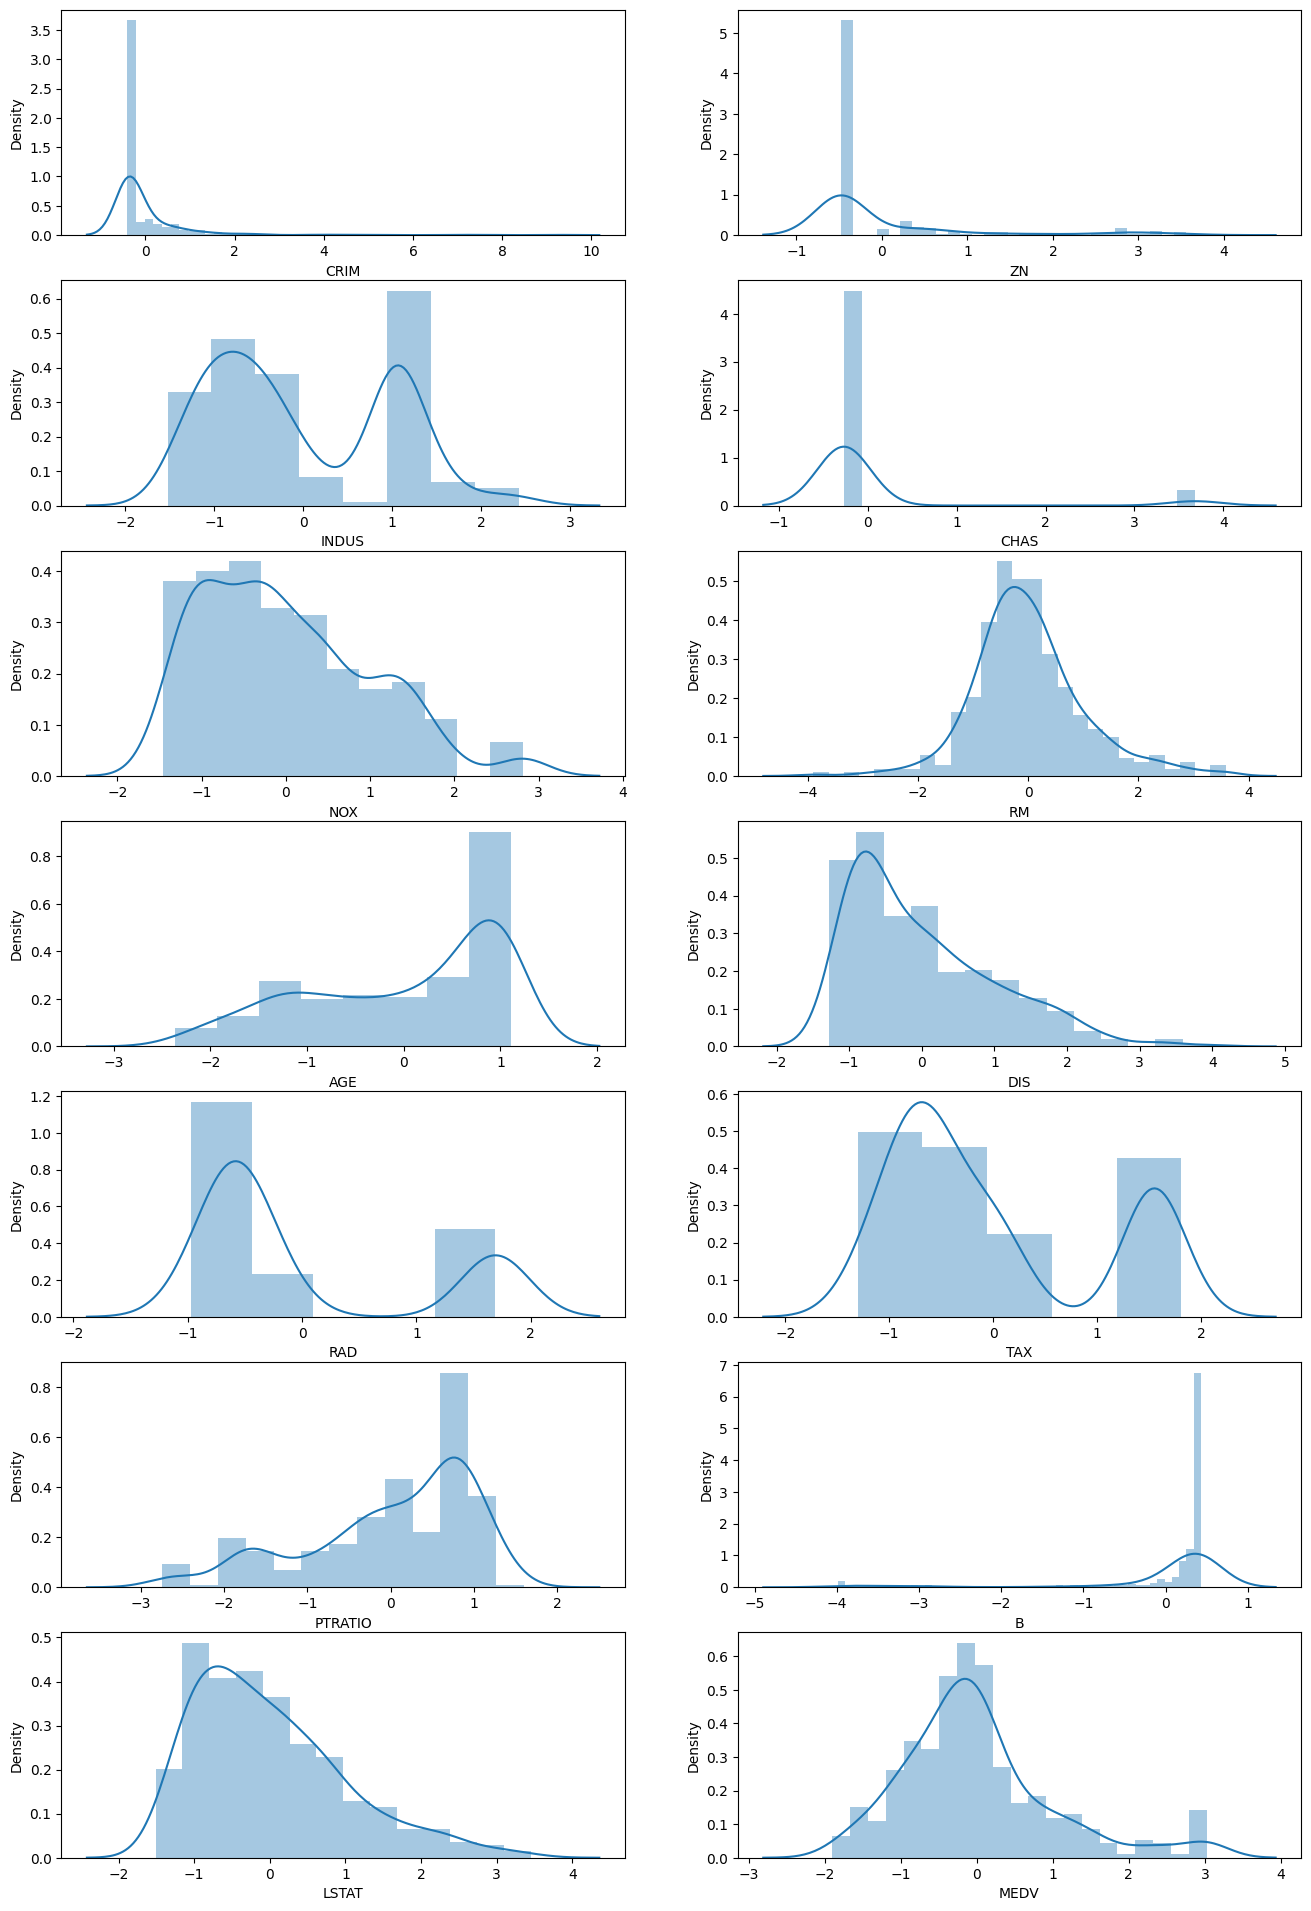

In [54]:
# lets look at the shape of data after scaling
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df_std.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(df_std[i],ax=ax)

### As you can see, shape did not change, only the mean value shifted to 0

# Principal Component Analysis

Проще говоря, PCA — это математическая процедура, которая берет несколько линейно коррелированных функций и возвращает несколько некоррелированных функций.

Он часто используется для уменьшения размерности для уменьшения сложности моделей обучения или для визуализации многомерных данных в 2D или 3D, что упрощает визуализацию.

Но сказать, что PCA — это всего лишь метод уменьшения размерности, все равно, что сказать, что Java и Javascript — это одно и то же.

<b>Wiki</b>

Анализ главных компонентов (PCA) — это статистическая процедура, которая использует ортогональное преобразование для преобразования набора наблюдений возможно коррелирующих переменных (объектов, каждый из которых принимает различные числовые значения) в набор значений линейно некоррелированных переменных, называемых главными компонентами.
Это преобразование определяется таким образом, что первый главный компонент имеет максимально возможную дисперсию (то есть учитывает как можно большую изменчивость данных), а каждый последующий компонент, в свою очередь, имеет максимально возможную дисперсию при условии что он ортогонален предыдущим компонентам.
Результирующие векторы (каждый из которых представляет собой линейную комбинацию переменных и содержит n наблюдений) представляют собой некоррелированный ортогональный базисный набор. PCA чувствителен к относительному масштабированию исходных переменных.

### Зачем нам это здесь нужно?

Ну, нам это, конечно, не нужно для уменьшения размерности, поскольку наша модель не такая уж и сложная,
Нам нужно устранить проблему мультиколлинеарности в наших данных.

Мы собираемся ввести наши стандартизированные переменные-предикторы в преобразование PCA и получить набор некоррелированных функций.

In [55]:
# import libraries for PCA
from sklearn.decomposition import PCA

In [56]:
pca = PCA(n_components=13)
X = df_std.drop('MEDV',axis=1)
X_pca = pca.fit_transform(X)
df_std_pca = pd.DataFrame(X_pca,columns=['PCA1','PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10','PCA11','PCA12','PCA13'])
df_std_pca['MEDV'] = df_std['MEDV']

<Axes: >

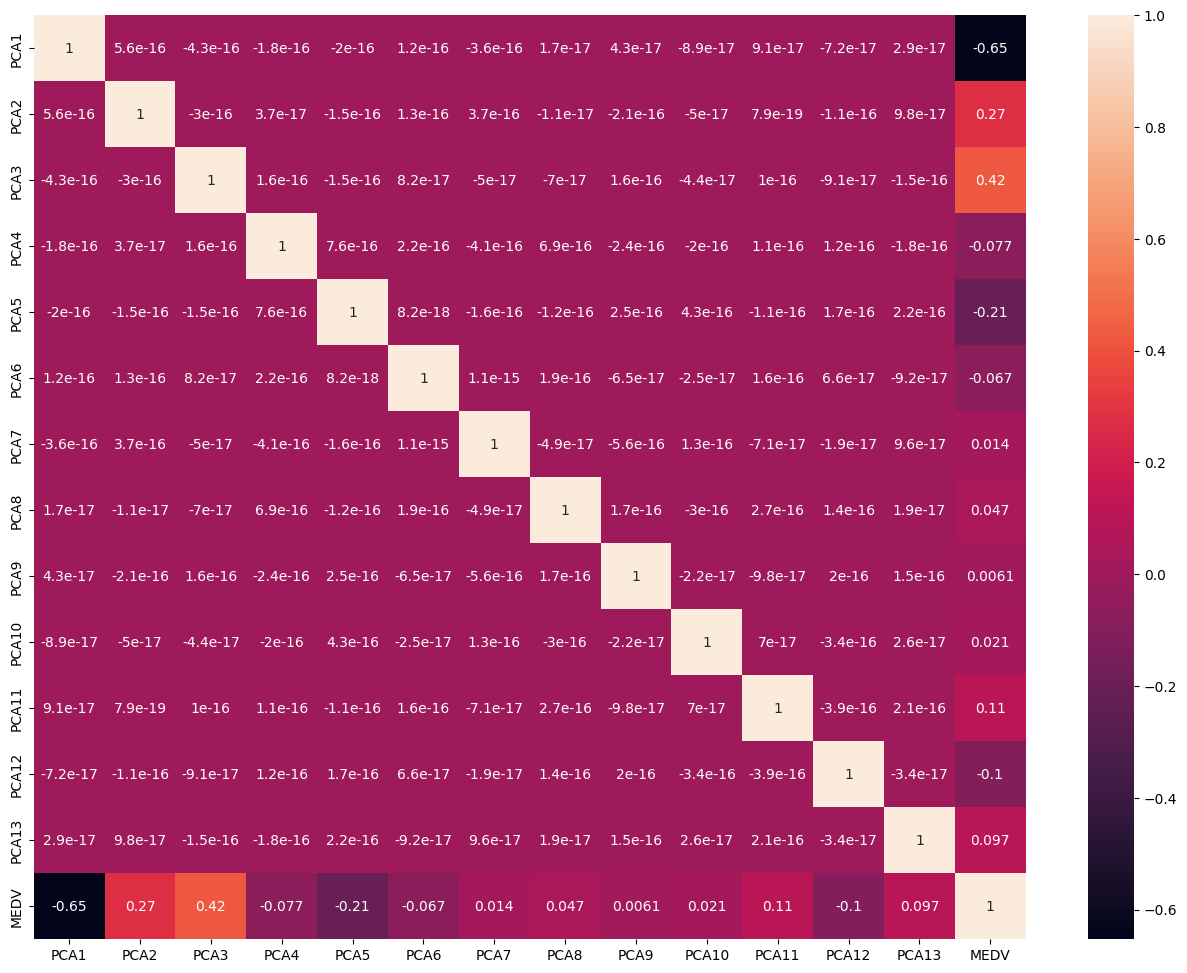

In [57]:
# Lets look at the correlation matrix now.
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sns.heatmap(df_std_pca.corr(),annot=True)

### Note : Как видите, между переменными-предикторами нет корреляции, что устраняет мультиколлинеарность.

#### Примечание. 
Причина, по которой корреляция между предикторной переменной и целевой переменной находится в отсортированном порядке, заключается в том, что PCA берет все объясненные вариации, помещает их в первые компоненты и повторяет процесс. Новые функции никак не связаны со старыми, поэтому использовать для них одно и то же имя было бы неправильно.

#### Примечание. 
PCA часто используется для анонимизации данных, поскольку он делает данные полностью отличными от исходных, сохраняя при этом информацию в данных нетронутой.

/var/folders/j5/k1rdz_7s6q1_gkrbwlghktvc0000gn/T/ipykernel_94785/2651786756.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_std_pca[i],ax=ax)
/var/folders/j5/k1rdz_7s6q1_gkrbwlghktvc0000gn/T/ipykernel_94785/2651786756.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_std_pca[i],ax=ax

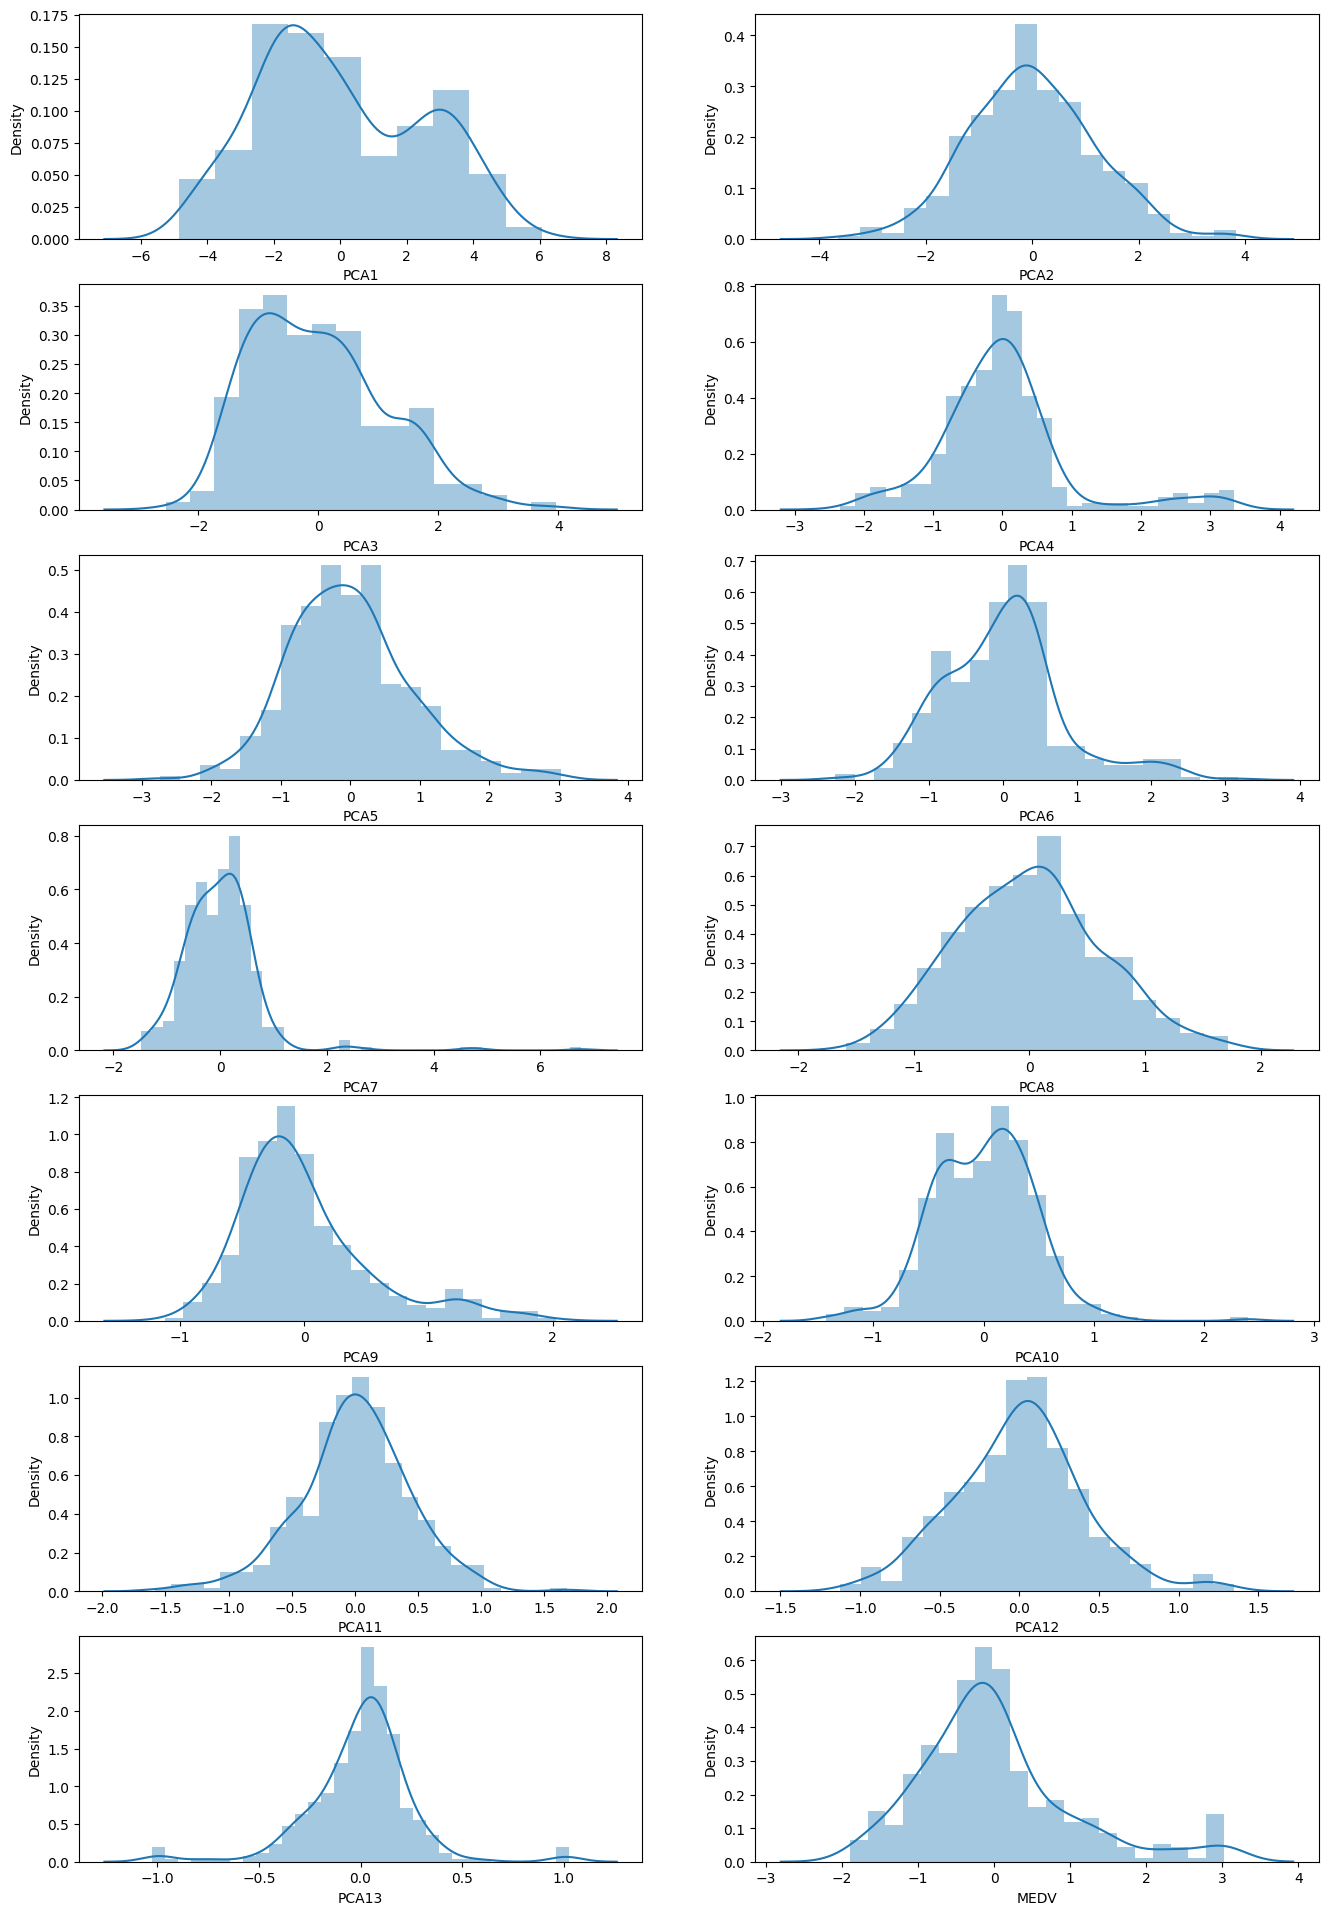

In [58]:
# Lets look at the distribution of our features after applying PCA
pos = 1
fig = plt.figure(figsize=(16,24))
for i in df_std_pca.columns:
    ax = fig.add_subplot(7,2,pos)
    pos = pos + 1
    sns.distplot(df_std_pca[i],ax=ax)

# Data Modelling

### Now that our data is ready, we can apply our modelling techniques to it.

## Simple Linear Regression

In [59]:
# import libraires needed to perform our Regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [60]:
# Split data into Training and testing
X = np.array(df_std_pca.drop('MEDV',axis=1))
y = np.array(df_std_pca['MEDV'])
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
for i in [X_train,X_test,y_train,y_test]:
    print("Shape of Data is {}".format(i.shape))

Shape of Data is (315, 13)
Shape of Data is (79, 13)
Shape of Data is (315,)
Shape of Data is (79,)


In [61]:
# Lets train our model on training data and predict also on training to see results
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_train)
r2 = r2_score(y_train,y_pred)
rmse = np.sqrt(mean_squared_error(y_train,y_pred))
print('R-Squared Score is : {} | Root Mean Square Error is : {}'.format(r2,rmse))

R-Squared Score is : 0.7713993865218366 | Root Mean Square Error is : 0.48766752831055793
